#  Scenario: Loan Officer’s Rulebook
# Imagine you’re a loan officer at a bank. Every day, people apply for loans, and you need to decide whether to approve or reject them.
# Instead of guessing, you build a rulebook (that’s your Decision Tree).

# 📋 The Data
# - Each applicant has:
# - Credit Score (how trustworthy they are with money)
# - Income (in thousands)
# - Employment status (1 = employed, 0 = not employed)
# - Past applications are labeled:
# - 1 = Approved
# - 0 = Rejected
# This past data is like your training experience.

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_text
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X = [
    [720, 60, 1], [580, 35, 0], [700, 55, 1],
    [600, 40, 1], [750, 80, 1], [500, 25, 0],
    [680, 50, 1], [550, 30, 0], [730, 70, 1],
    [610, 42, 0],
]

y = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
tree = DecisionTreeClassifier(max_depth=3, criterion='gini')
tree.fit(x_train, y_train)

# Visualize rules
feature_names = ["credit_score", "income_k", "employed"]
print(export_text(tree, feature_names=feature_names))

# Evaluate
y_pred = tree.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Test new applicant
applicant = [[690, 52, 1]]
decision = tree.predict(applicant)
print("Decision:", "Approved" if decision[0] == 1 else "Failed")

|--- income_k <= 46.00
|   |--- class: 0
|--- income_k >  46.00
|   |--- class: 1

Accuracy: 1.0
Decision: Approved


Scenario: University Admissions Rulebook
Imagine you’re an admissions officer at a university. Every day, students apply for admission, and you need to decide whether to accept or reject them.
Instead of guessing, you build a rulebook (that’s your Decision Tree).

📋 The Data
- Each applicant has:
- High School GPA (how well they performed academically)
- Entrance Exam Score (their standardized test performance)
- Extracurriculars (1 = active in clubs/sports, 0 = not active)
- Past applications are labeled:
- 1 = Accepted
- 0 = Rejected
This past data is like your training experience.

👉 Just like the loan officer uses credit score, income, and employment status to decide, here the admissions officer uses GPA, exam scores, and extracurriculars to make decisions.

In [11]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

df = pd.read_csv("University Dataset - Sheet1.csv")

X = df[["HighSchool_GPA", "Exam_Score", "Extracurriculars"]]
y = df["Admission_Label"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train
tree = DecisionTreeClassifier(max_depth=3, criterion='gini')
tree.fit(X_train, y_train)

# Print Rules
feature_names = ["GPA", "Exam Score", "Extracurricular"]
print(export_text(tree, feature_names=feature_names))

# Evaluate
print("Accuracy:", accuracy_score(y_test, tree.predict(X_test)))

# Predict new applicant
new_student = [[8, 840, 2]]
decision = tree.predict(new_student)
print("Decision:", "Accepted" if decision[0]==1 else "Rejected")

|--- GPA <= 3.15
|   |--- class: 0
|--- GPA >  3.15
|   |--- class: 1

Accuracy: 0.8
Decision: Accepted


C:\Users\ANKIT RAJ\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Scenario Question: Email Spam Filter
# A company has built a machine learning model to detect spam emails.
# - True labels (y_true): Whether each email was actually spam (1 = Spam, 0 = Not Spam).
# - Predictions (y_pred): What the model guessed.
# - Probabilities (y_prob): How confident the model was in each prediction.
# The company wants to evaluate the model using accuracy, precision, recall, F1 score, ROC-AUC,

              precision    recall  f1-score   support

     notspam       0.80      0.80      0.80         5
        spam       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.8


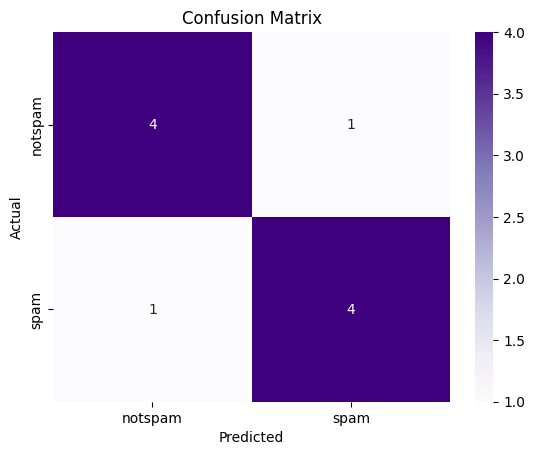

In [13]:
from sklearn.metrics import(accuracy_score,precision_score,recall_score,
                             f1_score,confusion_matrix,classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# Example true labels and model predictions
y_true = [1,0,1,1,0,1,0,0,1,0]
y_pred = [1,0,1,0,0,1,1,0,1,0]
y_prob = [0.9,0.1,0.8,0.4,0.2,0.85,0.6,0.15,0.7,0.3]

# Classification Report
print(classification_report(y_true, y_pred, target_names=["notspam","spam"]))

# Metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d",
            cmap="Purples",
            xticklabels=["notspam","spam"],
            yticklabels=["notspam","spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()